In [7]:
import iexfinance as iex
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
equity1 = iex.Stock('TSLA')

In [4]:
equity1.get_open()
equity1.get_price()

280.95

In [5]:
start = datetime(2017, 2, 9)
end = datetime(2017, 5, 24)
hist_equity1 = iex.get_historical_data('TSLA', start = start, end = end, output_format = 'pandas')
hist_equity1.head()

,open,high,low,close,volume
date,,,,,
2017-02-09,266.25,271.1800,266.15,269.20,7820222
2017-02-10,269.79,270.9500,266.11,269.23,3619739
2017-02-13,270.74,280.7899,270.51,280.60,7029605
2017-02-14,279.03,287.3900,278.61,280.98,7345224
2017-02-15,280.00,282.2400,276.44,279.76,4947856


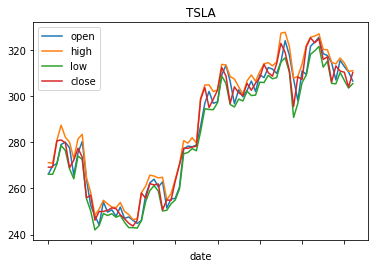

In [12]:
hist_equity1[['open', 'high', 'low', 'close']].plot(title = 'TSLA')
plt.show()